<h2><b>Final Project - Probability</b></h1>

<h2><b>Data Description</b></h1>
Analisis akan dilakukan pada data tagihan kesehatan yang diterima oleh setiap pengguna. Data ini berisi data personal pengguna seperti umur, gender, tempat tinggal pengguna, banyak anak tertanggung asuransi, nilai bmi, keadaan merokok atau tidaknya pengguna. Secara rinci, deskripsi setiap feature dari dataset adalah sebagai berikut:
<ul>
<li>Age (usia pengguna dalam tahun)</li>
<li>Sex (gender pengguna: pria/wanita)</li>
<li>BMI (nilai Body Mass Index pengguna)</li>
<li>Children (jumlah anak pengguna dalam tanggungan asuransi)</li>
<li>Smoker (kondisi merokok pengguna: ya/tidak)</li>
<li>Region ( wilayah di mana pengguna menetap)</li>
<li>Charges (biaya tagihan)</li>
</ul>

<h2><b>Objektif</b></h1>
<ul>
<li>Analisis Descriptive Statistic.</li>
<li>Analisis Peluang pada Variabel Diskrit.</li>
<li>Analisis Peluang pada Variabel Kontinu.</li>
<li>Analisis Korelasi Variabel.</li>
<li>Melakukan Uji Hipotesis.</li>

</ul>


In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
%matplotlib inline

In [137]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [139]:
# Melihat statistika dasar pada data numerik
df.describe()

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## Analisis Descriptive Statistic

- Berapa rata rata umur pada data tersebut?

In [140]:
# rata-rata umur
mean_age = df["age"].mean()
print(f"Rata-rata umur pengguna insurance yaitu :{mean_age}")

Rata-rata umur pengguna insurance yaitu :39.20702541106129


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13200\3679304422.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()))


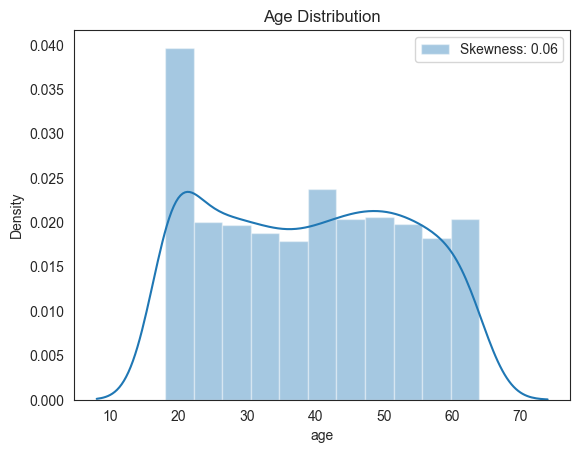

In [141]:
sns.set_style('white')
sns.distplot(df['age'], label = 'Skewness: %.2f'%(df['age'].skew()))
plt.legend(loc = 'best')
plt.title('Age Distribution')
plt.show()

- Berapa rata rata nilai BMI dari yang merokok?

In [142]:
# rata-rata BMI
mean_bmi = df["age"].mean()
print(f"Rata-rata umur pengguna insurance yaitu :{mean_bmi}")

Rata-rata umur pengguna insurance yaitu :39.20702541106129


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13200\3234348494.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], label = 'Skewness: %.2f'%(df['bmi'].skew()))


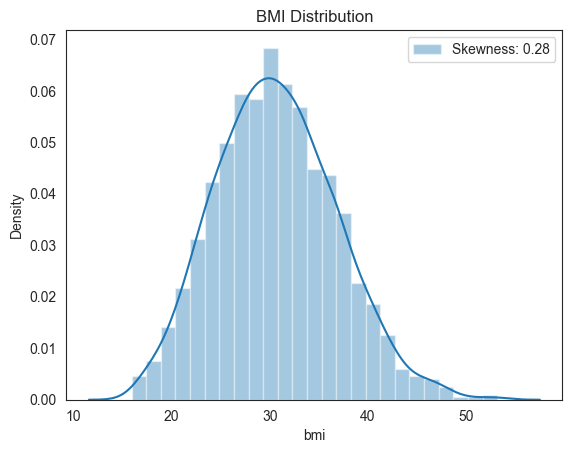

In [143]:
sns.set_style('white')
sns.distplot(df['bmi'], label = 'Skewness: %.2f'%(df['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('BMI Distribution')
plt.show()

- Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

Variance Charges Smoker = 132721153.14
Variance Charges Non Smoker = 35891656.00


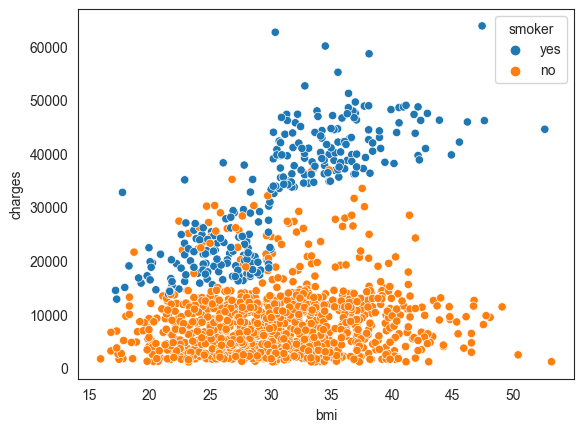

In [144]:
# Variansi data charges perokok dan non perokok
var_charges_S = np.var(df[df['smoker'] == "yes"].charges)
var_charges_NS = np.var(df[df['smoker'] == "no"].charges)

print(f'Variance Charges Smoker = {var_charges_S:.2f}')
print(f'Variance Charges Non Smoker = {var_charges_NS:.2f}')

sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
plt.show()

- Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [145]:
# rata-rata umur perokok laki-lai dan perempuan
mean_smoker_male = np.mean(df[df['sex'] == 'male'].age)
mean_smoker_female = np.mean(df[df['sex'] == 'female'].age)

print(f'Rata-rata umur perokok laki-laki = {mean_smoker_male:.2f}')
print(f'Rata-rata umur perokok perempuan = {mean_smoker_female:.2f}')

Rata-rata umur perokok laki-laki = 38.92
Rata-rata umur perokok perempuan = 39.50


- Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [146]:
# rata rata tagihan kesehatan perokok dan non merokok
charges_smoker = np.mean(df[df['smoker'] == 'yes'].charges)
charges_non_smoker = np.mean(df[df['smoker'] == 'no'].charges)

print(f'Rata-rata tagihan kesehatan perokok = {charges_smoker:.2f}')
print(f'Rata-rata tagihan kesehatan non perokok = {charges_non_smoker:.2f}')

Rata-rata tagihan kesehatan perokok = 32050.23
Rata-rata tagihan kesehatan non perokok = 8434.27


## Analisis Peluang pada Variabel Diskrit

- Gender mana yang memiliki tagihan paling tinggi?

In [147]:
pd.DataFrame(df.groupby(['sex']).max().charges)

,charges
sex,
female,63770.43
male,62592.87


- Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [148]:
pd.DataFrame(df.groupby(['region']).count().age).rename(columns={'age':'people'})

,people
region,
northeast,324
northwest,325
southeast,364
southwest,325


- Mana yang lebih tinggi proporsi perokok atau non perokok?

In [149]:
pd.DataFrame(df.groupby(['smoker']).count().age).rename(columns={'age':'people'})

,people
smoker,
no,1064
yes,274


- Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?


In [150]:
count_smokers = df.groupby(['smoker']).count().age[1]
male_smokers = df.loc[(df.smoker == 'yes')].groupby(['sex']).count().age[1]

print(f'Peluang seseorang laki-laki jika diketahui dia merokok = {male_smokers/count_smokers:.3f}')

Peluang seseorang laki-laki jika diketahui dia merokok = 0.580


- Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [151]:
count_smokers = df.groupby(['smoker']).count().age[1]
female_smokers = df.loc[(df.smoker == 'yes')].groupby(['sex']).count().age[0]

print(f'Peluang seseorang perempuan jika diketahui dia merokok = {female_smokers/count_smokers:.3f}')

Peluang seseorang perempuan jika diketahui dia merokok = 0.420


## Analisa Variabel Kontinu

**Mana yang lebih mungkin terjadi**

Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, atau Seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k

In [152]:
# Hitung proporsi data dengan BMI di atas 25 dan tagihan kesehatan di atas 16.7k
prop_a = ((df['bmi'] > 25) & (df['charges'] > 16700)).sum() / len(df)

# Hitung proporsi data dengan BMI di bawah 25 dan tagihan kesehatan di atas 16.7k
prop_b = ((df['bmi'] < 25) & (df['charges'] > 16700)).sum() / len(df)

print('Proporsi kasus a:', prop_a)
print('Proporsi kasus b:', prop_b)

Proporsi kasus a: 0.21150971599402094
Proporsi kasus b: 0.03811659192825112


**Mana yang lebih mungkin terjadi**

Seseorang pengguna yang merokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k, atau Seseorang pengguna yang tidak merokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k

In [153]:
a = len(df[(df['smoker'] == 'yes') & (df['bmi'] > 25) & (df['charges'] > 16700)])

b = len(df[(df['smoker'] == 'no') & (df['bmi'] > 25) & (df['charges'] > 16700)])

prop_a = a / len(df)

prop_b = b / len(df)

print("Proporsi kasus a:", prop_a)
print("Proporsi kasus b:", prop_b)

Proporsi kasus a: 0.16068759342301944
Proporsi kasus b: 0.05082212257100149


## Analisis Korelasi Variabel

          age  bmi  children  charges
age      1.00 0.11      0.04     0.30
bmi      0.11 1.00      0.01     0.20
children 0.04 0.01      1.00     0.07
charges  0.30 0.20      0.07     1.00


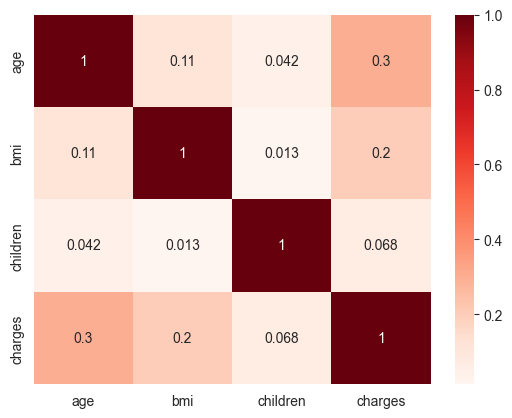

In [154]:
# menghitung korelasi antara kolom numerik
corr = df.corr()

# print hasil korelasi
print(corr)

# menampilkan heatmap
sns.heatmap(corr, annot=True, cmap='Reds')
plt.show()

## Melakukan Uji Hipotesis

Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

Hipotesis:
- H0 : Tagihan perokok = tagihan non perokok
- H1 : Tagihan perokok > tagihan non perokok

Tingkat signifikasi : 5%

In [159]:
alpha = 0.05
H0 = "Tagihan kesehatan pengguna yang merokok = tagihan kesehatan pengguna yang tidak merokok"
H1 = "Tagihan kesehatan pengguna yang merokok lebih tinggi dari pengguna yang tidak merokok"

stat, p = stats.ttest_ind(df[df['smoker']=='yes']['charges'], df[df['smoker']=='no']['charges'])
print('Statistik: ', stat)
print('p-value: ', p)

Statistik:  46.66492117272371
p-value:  8.271435842179102e-283


In [156]:
# Pengambilan keputusan
if p>alpha:
    print("HO diterima, yaitu: ", H0)
else:
    print("H0 ditolak H1 diterima, yaitu: ", H1)

H0 ditolak H1 diterima, yaitu:  Tagihan kesehatan pengguna yang merokok lebih tinggi dari pengguna yang tidak merokok
